# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

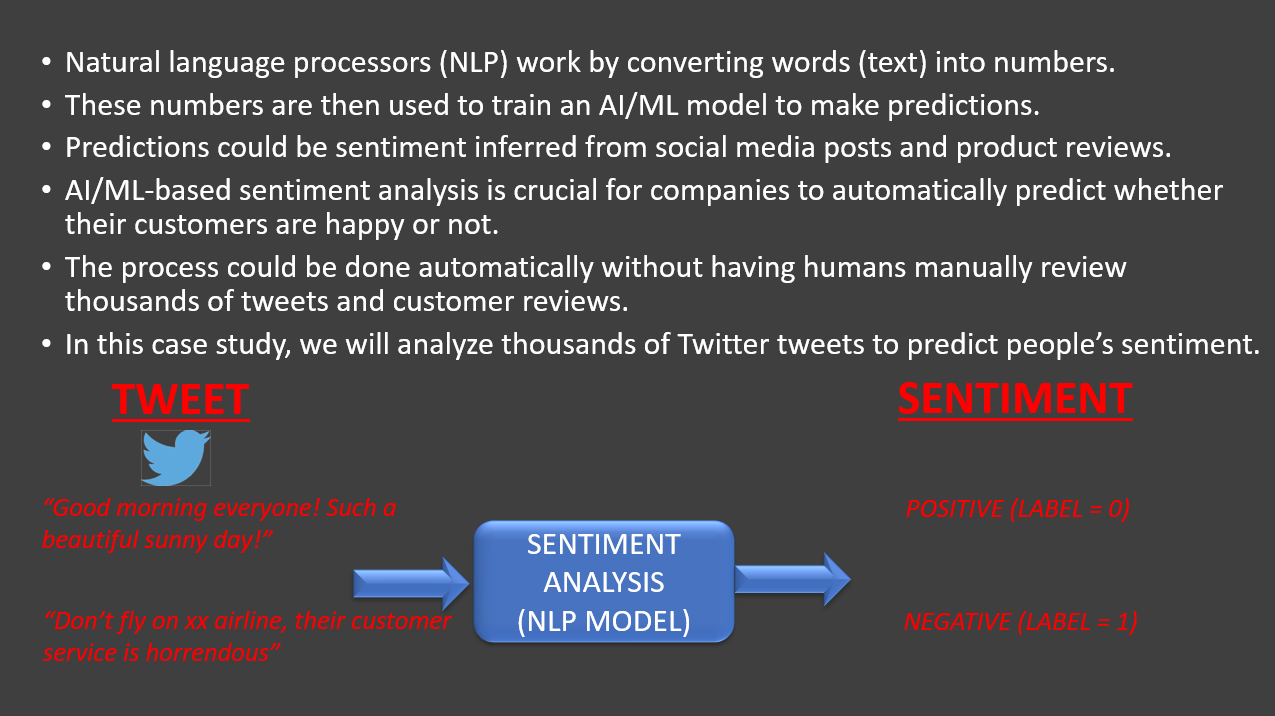

data source: https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [2]:
# Load the data
tweets_df = pd.read_csv('twitter.csv')
tweets_df = tweets_df.iloc[:5000,:]
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5000 non-null   int64 
 1   label   5000 non-null   int64 
 2   tweet   5000 non-null   object
dtypes: int64(2), object(1)
memory usage: 117.3+ KB


In [4]:
tweets_df.describe()

,id,label
count,5000.000000,5000.000000
mean,2500.500000,0.068200
std,1443.520003,0.252114
min,1.000000,0.000000
25%,1250.750000,0.000000
50%,2500.500000,0.000000
75%,3750.250000,0.000000
max,5000.000000,1.000000


In [5]:
tweets_df['tweet'].head(10)

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object

MINI CHALLENGE #1: 
- Drop the 'id' column from the DataFrame. 
- Ensure that the column has been succesfully dropped. 

In [6]:
tweets_df.drop('id', axis = 1, inplace = True)


# TASK #3: EXPLORE DATASET

<AxesSubplot:>

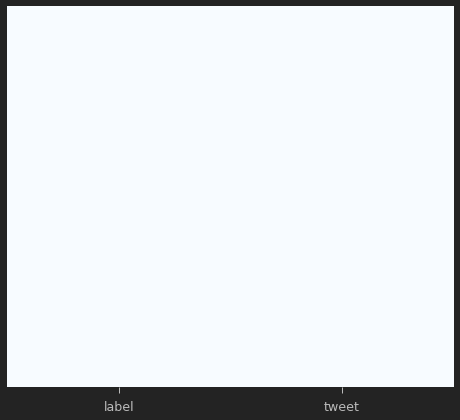

In [7]:
 sns.heatmap(tweets_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

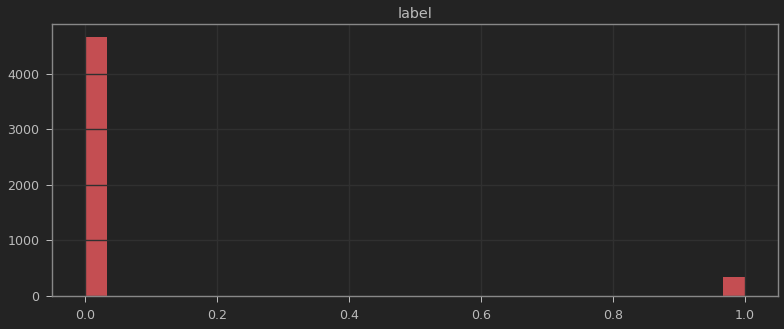

In [8]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

MINI CHALLENGE #2: 
- Plot similar figure using seaborn countplot

<AxesSubplot:xlabel='label', ylabel='count'>

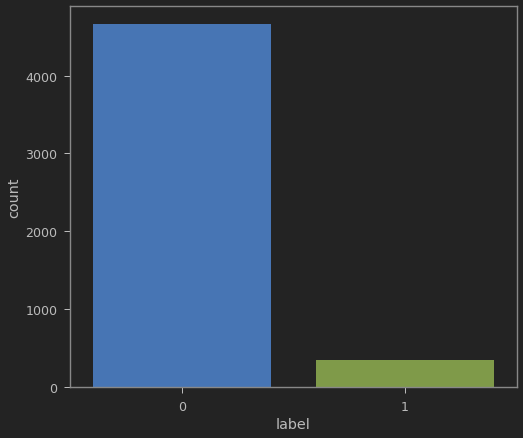

In [9]:
sns.countplot(x = tweets_df['label'])

In [10]:
# Let's get the length of the messages
tweets_df['length'] = tweets_df['tweet'].str.len()

In [11]:
tweets_df.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


<AxesSubplot:ylabel='Frequency'>

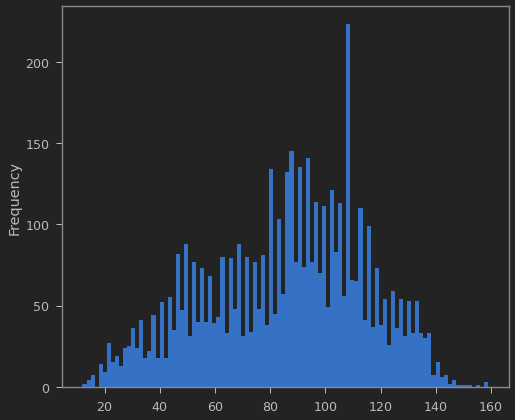

In [12]:
tweets_df['length'].plot(bins=100, kind='hist') 

In [13]:
tweets_df.describe()

,label,length
count,5000.000000,5000.000000
mean,0.068200,85.690200
std,0.252114,28.937776
min,0.000000,12.000000
25%,0.000000,64.000000
50%,0.000000,89.000000
75%,0.000000,108.000000
max,1.000000,159.000000


In [14]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 11]['tweet']

Series([], Name: tweet, dtype: object)

MINI CHALLENGE #3
- View the message with the average length

In [15]:
average_length = np.floor(np.mean(tweets_df['length']))
tweets_df[tweets_df['length'] == average_length]

,label,tweet,length
115,0,â #under the spell of brexit referendum - c...,85
242,0,make today count! #mondaymotivation #livelifet...,85
384,0,"dream palace, can we move in already? #stellar...",85
573,0,@user monkeys are also declared as vermin. no ...,85
634,0,save thousands $$ free search x logins x broke...,85
731,0,"â #usd long positions added, eur shos incre...",85
765,0,monday mornings working by the lake #scottiean...,85
794,0,#wishing all wonderful #dads a #father's #da...,85
801,0,"my hea prayers are with the orlando victims, t...",85
952,0,appletstag #compleanno #toa #cake #family bda...,85


In [16]:
positive = tweets_df[tweets_df['label']==0]

In [17]:
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
4995,0,this wasn't only an attack on the lgbt communi...,137
4996,0,@user looking forward to catching you there? ...,101
4997,0,3 apps to help keep you &amp; #healthy ðð...,85
4998,0,"@user #bestsellers #top10 #sales ""never go ...",97


In [18]:
negative = tweets_df[tweets_df['label']==1]

In [19]:
negative

,label,tweet,length
13,1,@user #cnn calls #michigan middle school 'buil...,74
14,1,no comment! in #australia #opkillingbay #se...,101
17,1,retweet if you agree!,22
23,1,@user @user lumpy says i am a . prove it lumpy.,47
34,1,it's unbelievable that in the 21st century we'...,104
...,...,...,...
4914,1,it was an error on my pa i agree. she was an ...,117
4935,1,@user i decided to become a #feminist beginnin...,127
4952,1,2016 was the year white liberals realized how ...,78
4954,1,why only target little #muslim children for mi...,112


# TASK #4: PLOT THE WORDCLOUD

In [20]:
sentences = tweets_df['tweet'].to_list()

In [21]:
sentences_as_one_string = " ".join(sentences)

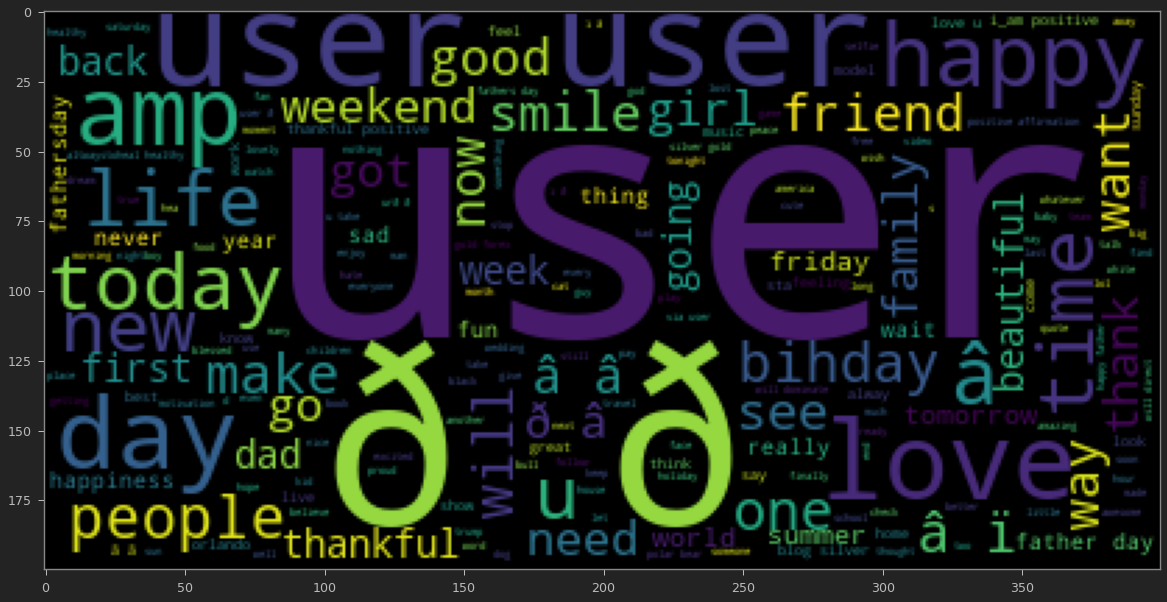

In [22]:
#!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

MINI CHALLENGE #4: 
- Plot the wordcloud of the "negative" dataframe. 
- What do you notice? Does the data make sense?

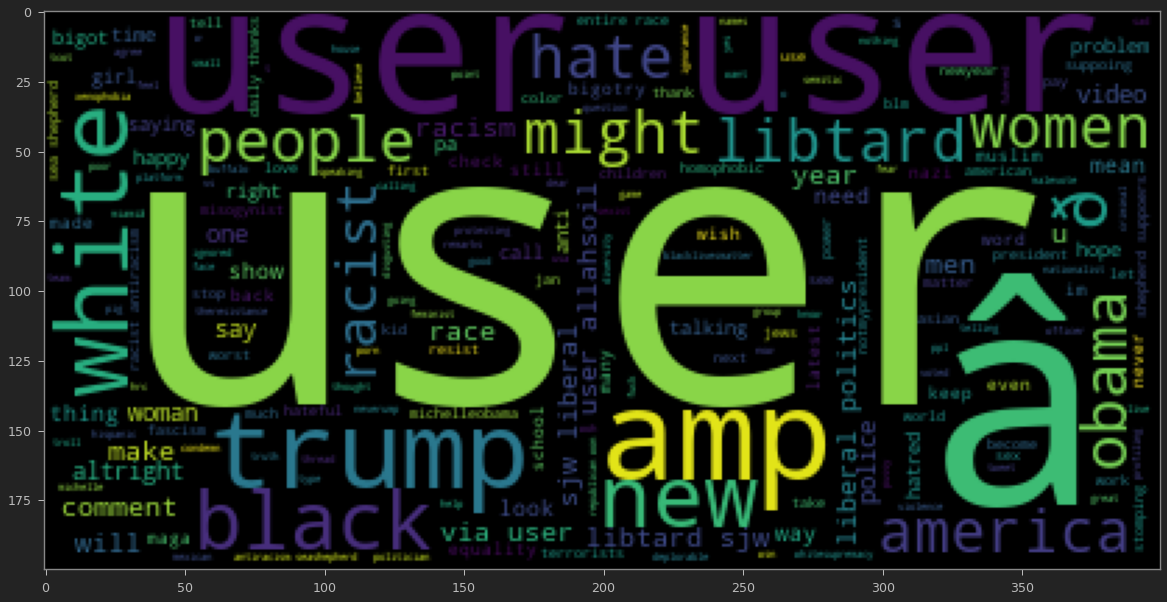

In [23]:
negative_sentences = negative['tweet'].to_list()
negative_sentences_as_a_string = " ".join(negative_sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_a_string))

# TASK #5: PERFORM DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [24]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'

In [26]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed_joined = "".join(Test_punc_removed)

In [27]:
# Join the characters again to form the string.
Test_punc_removed_joined

'Good morning beautiful people  I am having fun learning Machine learning and AI'

MINI CHALLENGE #5: 
- Remove punctuations using a different method


In [28]:
translator = str.maketrans('','',string.punctuation)
Test.translate(translator)

'Good morning beautiful people  I am having fun learning Machine learning and AI'

# TASK 6: PERFORM DATA CLEANING - REMOVE STOPWORDS

In [29]:
import nltk # Natural Language tool kit 

#nltk.download('stopwords')

In [30]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')[:50]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be']

In [31]:
Test_punc_removed_join_clean  = [word for word in Test_punc_removed_joined.split() if word.lower() not in stopwords.words('english')]

In [32]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Good',
 'morning',
 'beautiful',
 'people',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

MINI CHALLENGE #6: 
- For the following text, create a pipeline to remove punctuations followed by removing stopwords

In [33]:
mini_challenge = 'Here is a mini challenge, that will teach you how to remove stopwords and punctuations!'

In [34]:
translator = str.maketrans('','',string.punctuation)
mini_challenge_punctuations_removed = mini_challenge.translate(translator)
mini_challenge_punctuations_and_stopwords_removed = [word for word in mini_challenge_punctuations_removed.split() if word.lower() not in stopwords.words('english')]
mini_challenge_punctuations_and_stopwords_removed

['mini', 'challenge', 'teach', 'remove', 'stopwords', 'punctuations']

# TASK 7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

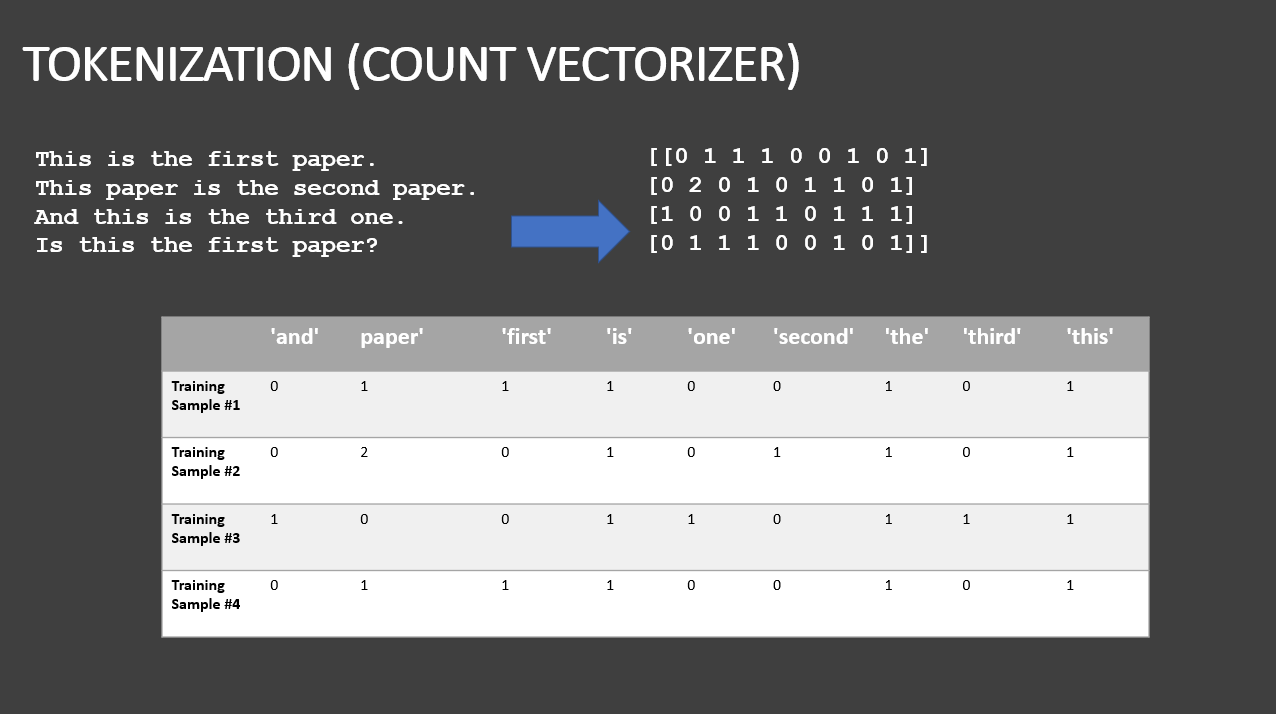

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [36]:
import scipy
X.toarray()

array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 1]])

MINI CHALLENGE #7:
- Without doing any code, perform count vectorization for the following list:
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
- Confirm your answer with code

In [37]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(mini_challenge)
print(vectorizer.get_feature_names())
print(X.toarray())

['hello', 'world']
[[1 1]
 [2 1]
 [1 3]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [38]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords
def message_cleaning(message):
    translator = str.maketrans('','',string.punctuation)
    #Test_punc_removed =  message.translate(translator)
    Test_punc_removed_join = message.translate(translator)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [39]:
# Let's test the newly added function
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [40]:
print(tweets_df_clean[5]) # show the cleaned up version

['22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo']


In [41]:
print(tweets_df['tweet'][5]) # show the original version

[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])


In [43]:
vectorizer.get_feature_names()[:50]

['0',
 '001',
 '00h30',
 '0115',
 '0161',
 '02',
 '0266808099',
 '02900',
 '03',
 '030916',
 '05',
 '060616',
 '061116',
 '0620',
 '07040',
 '07190',
 '07800',
 '07850',
 '07930',
 '07950',
 '08',
 '080616',
 '1',
 '10',
 '100',
 '1000',
 '1000gifts',
 '1000x',
 '1001000s',
 '100k',
 '101',
 '1014',
 '10670',
 '1080',
 '10k',
 '10meses',
 '10th',
 '11',
 '1111',
 '1117',
 '11192016',
 '11240',
 '1127tn',
 '1130',
 '11350',
 '11400',
 '116',
 '11911',
 '11j',
 '11th']

In [44]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [45]:
tweets_countvectorizer.shape

(5000, 13550)

In [46]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())


In [47]:
X = tweets


In [48]:
X

,0,1,2,3,4,5,6,7,8,9,...,13540,13541,13542,13543,13544,13545,13546,13547,13548,13549
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = tweets_df['label']

# TASK #9: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES

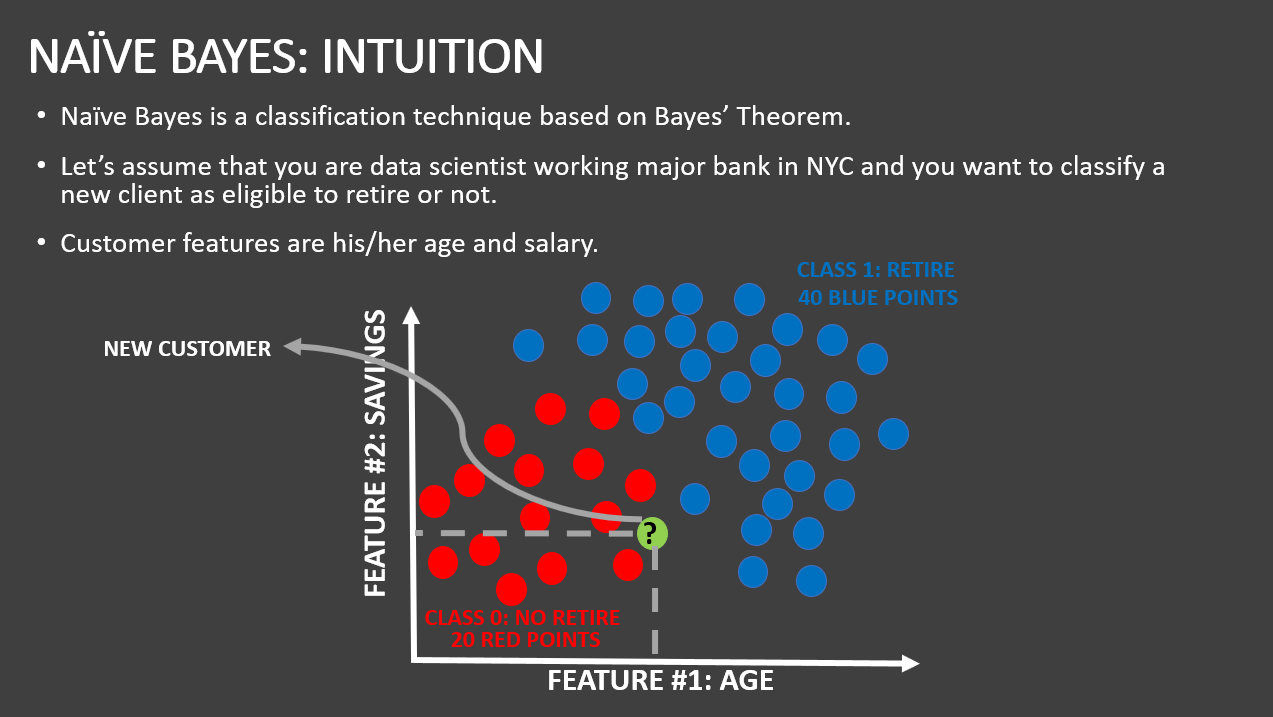

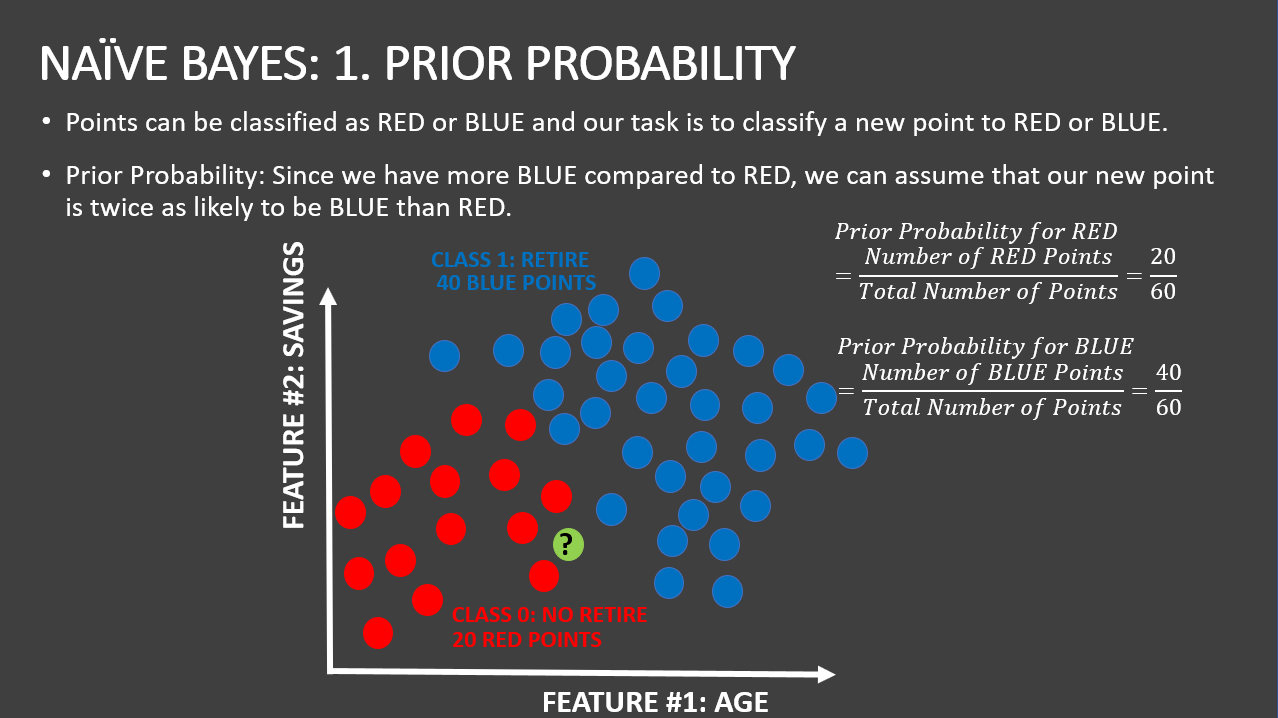

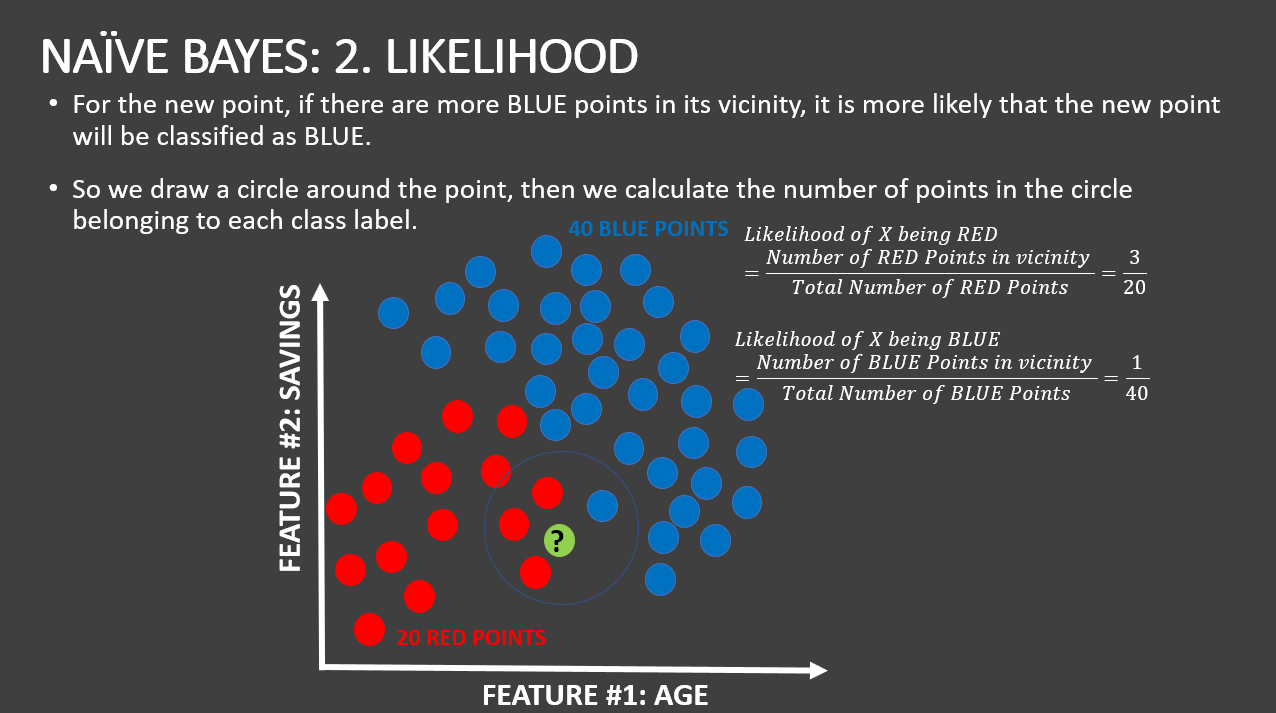

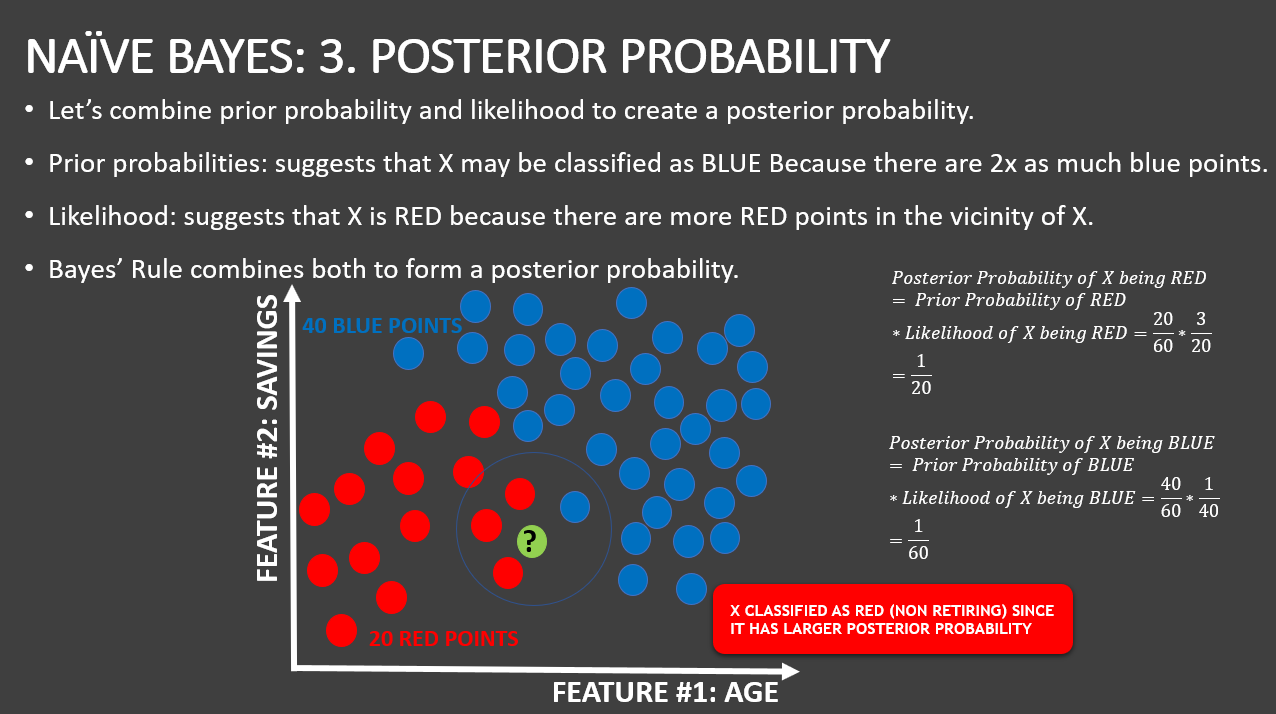

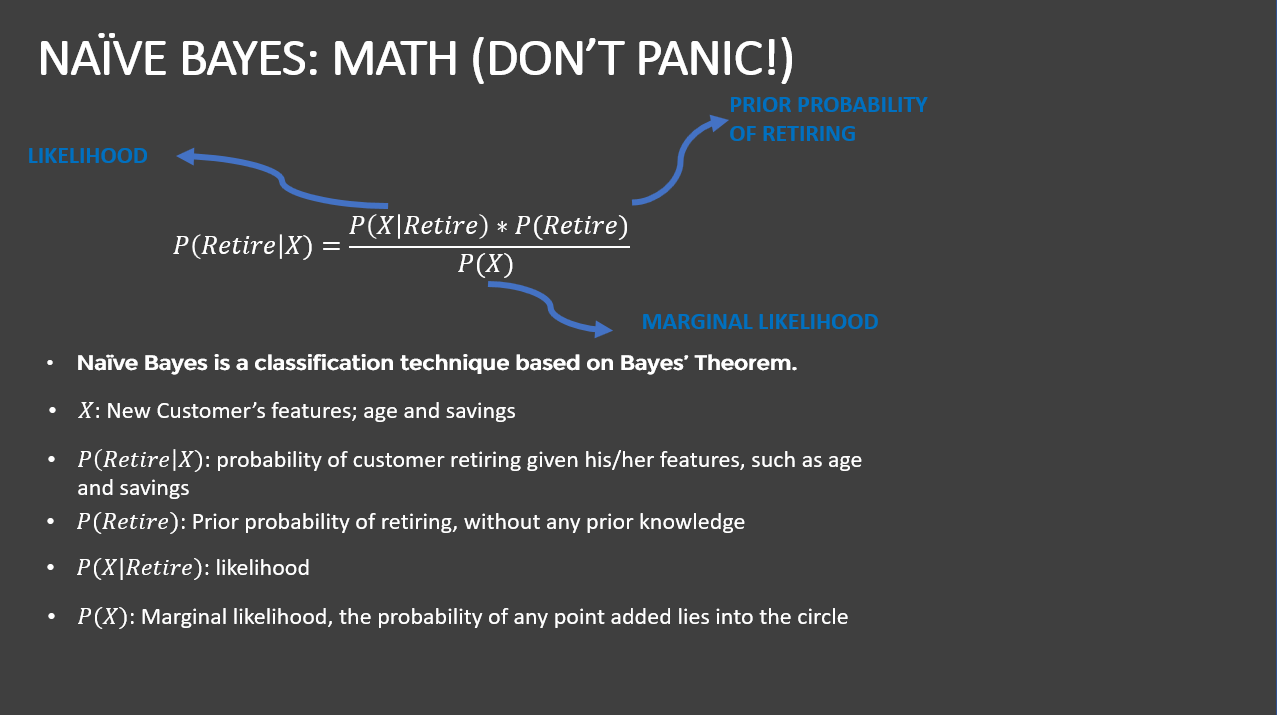

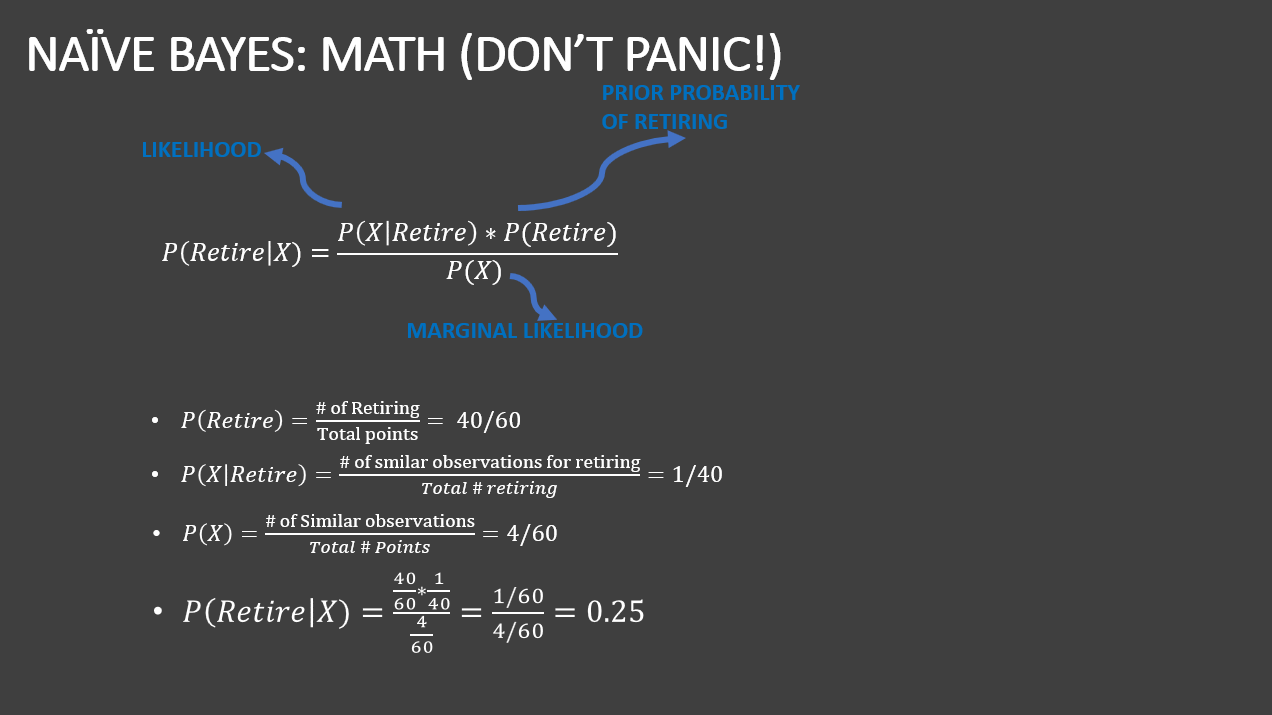

MINI CHALLENGE #8

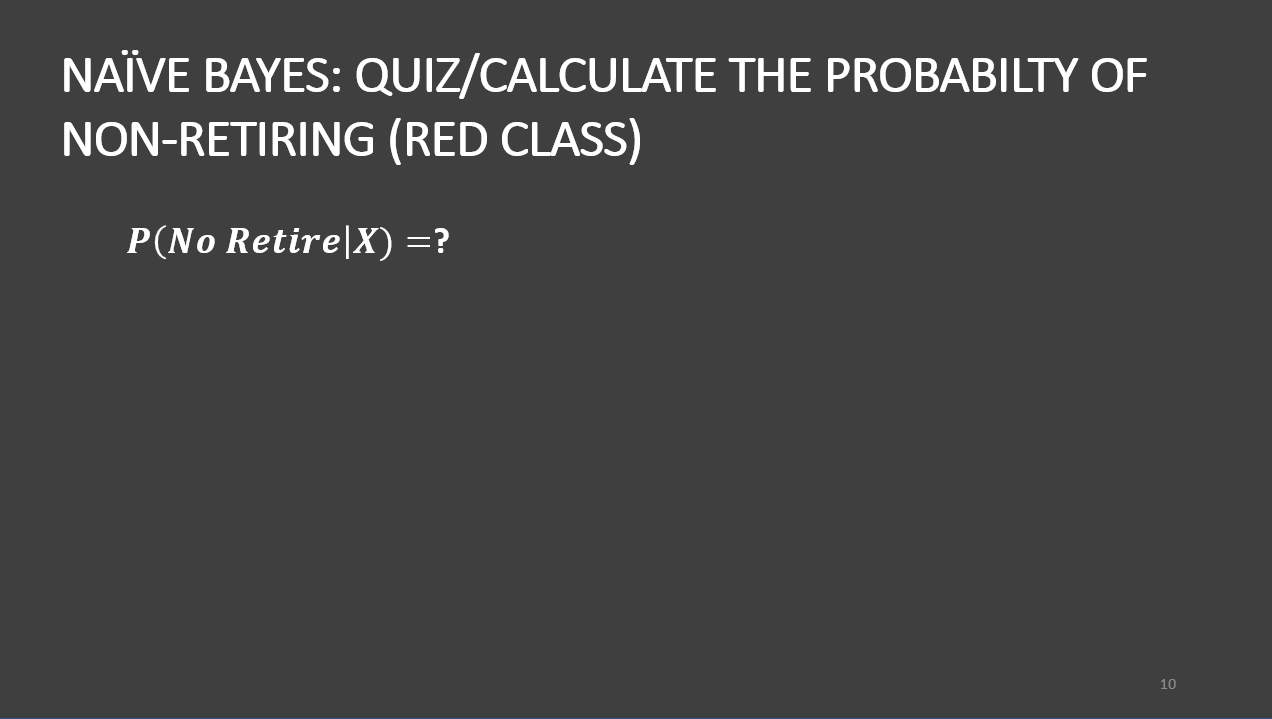

# TASK #10: TRAIN A NAIVE BAYES CLASSIFIER MODEL

In [50]:
X.shape

(5000, 13550)

In [51]:
y.shape

(5000,)

In [52]:
X_2, X_test, y_2, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)

In [53]:

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

# TASK #11: ASSESS TRAINED MODEL PERFORMANCE  

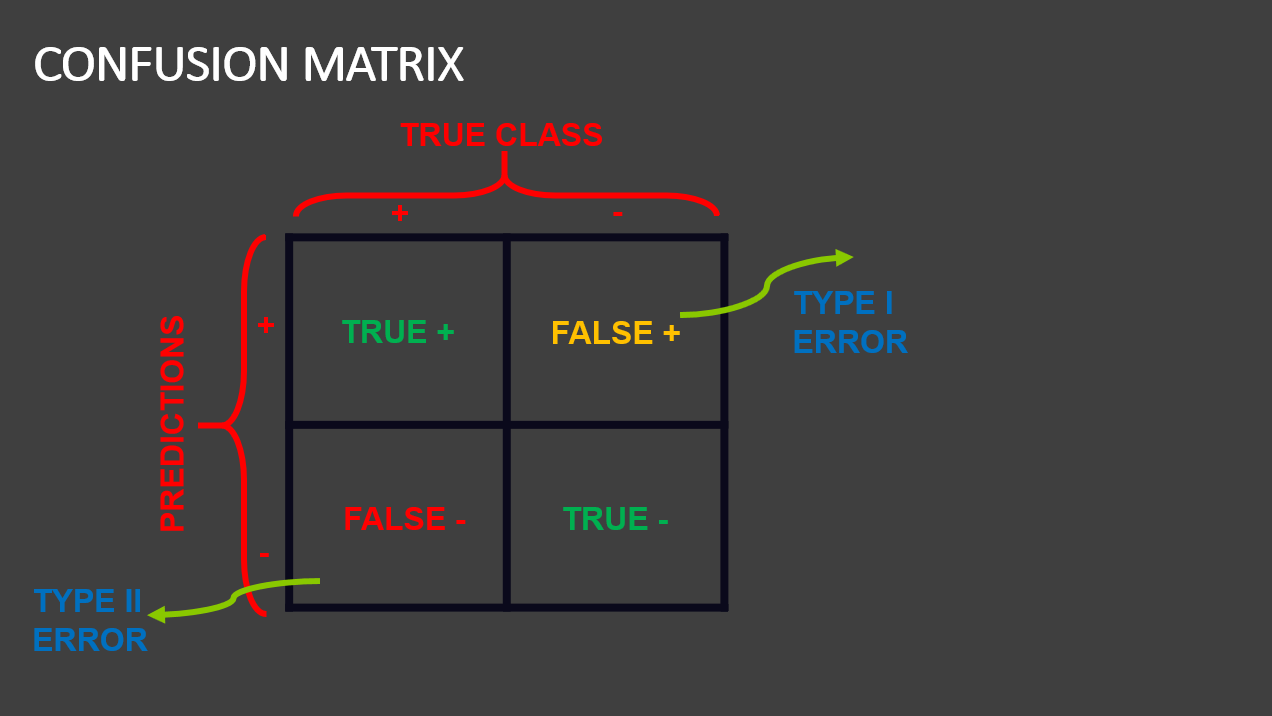

<AxesSubplot:>

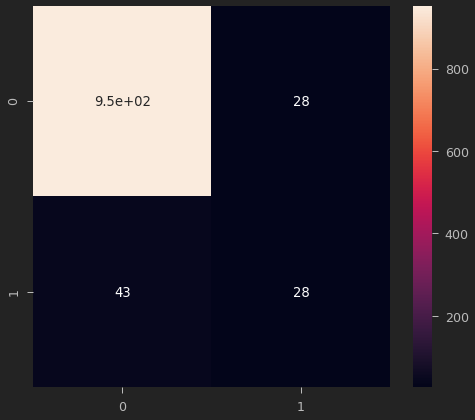

In [54]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [55]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       979
           1       0.50      0.39      0.44        71

    accuracy                           0.93      1050
   macro avg       0.73      0.68      0.70      1050
weighted avg       0.93      0.93      0.93      1050



MINI CHALLENGE #9: 
- Retrain and reassess the model using a different type of classifier such as logistic regression classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_predict_test = logistic.predict

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [56]:
# Drop the 'id' column
tweets_df = tweets_df.drop(['id'], axis=1)

KeyError: "['id'] not found in axis"

MINI CHALLENGE #2

In [ ]:
sns.countplot(tweets_df['label'], label = "Count") 

MINI CHALLENGE #3

In [ ]:
# Let's see the message with mean length 
tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

MINI CHALLENGE #4

In [ ]:
negative_list = negative['tweet'].tolist()
negative_list
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

MINI CHALLENGE #5

In [ ]:
Test_punc_removed = []
for char in Test: 
    if char not in string.punctuation:
        Test_punc_removed.append(char)
        
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

MINI CHALLENGE #6

In [ ]:
challege = [ char     for char in mini_challenge  if char not in string.punctuation ]
challenge = ''.join(challege)
challenge = [  word for word in challenge.split() if word.lower() not in stopwords.words('english')  ] 

MINI CHALLENGE #7

In [ ]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

MINI CHALLENGE #8

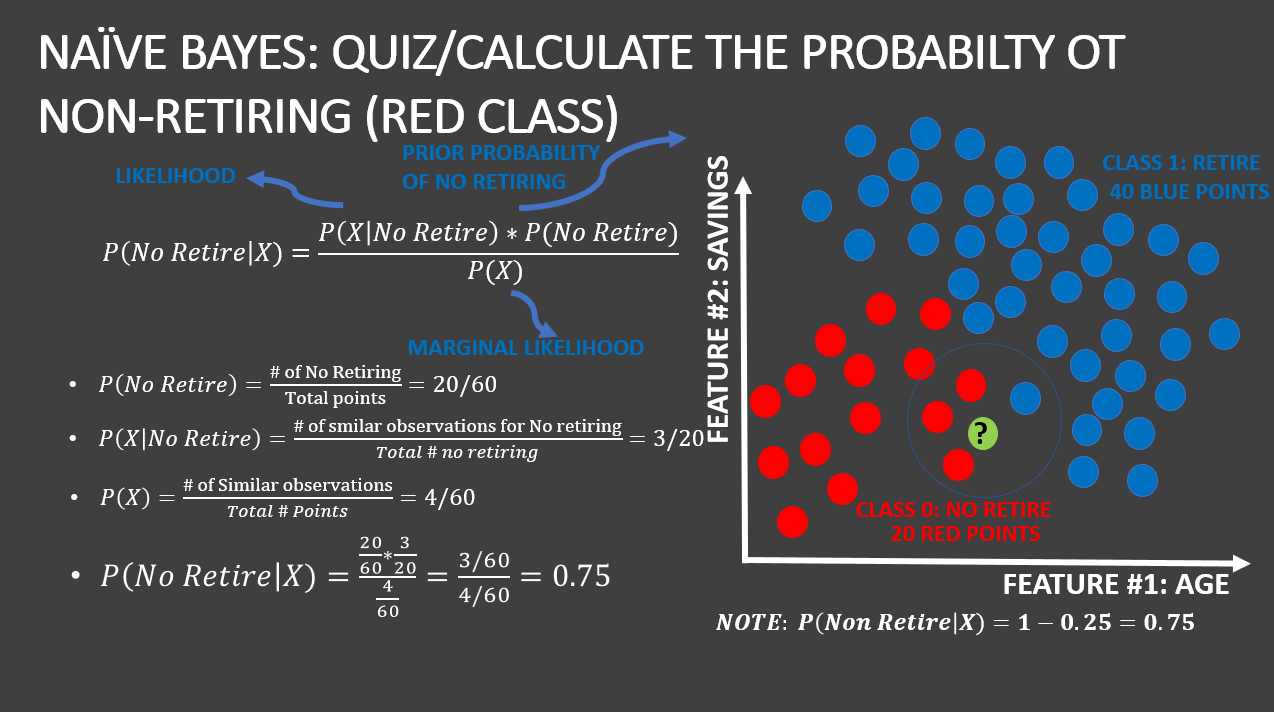